# Exploratory Data Analysis of Cleaned Data

This Jupyter notebook is designed to perform exploratory data analysis (EDA) on a dataset that has been previously cleaned using the ETL.ipynb notebook. The purpose of EDA is to gain a better understanding of the data and to identify any patterns, trends, or relationships that may exist within the data. The cleaned data is stored in the clean_data folder.

## Step 1: Remove Outliers

The first step in our EDA is to identify and remove any outliers from the data. Outliers are data points that are significantly different from other data points in the dataset and can have a significant impact on statistical analysis. To identify outliers, we can use various methods, such as box plots or scatter plots, and statistical techniques like Z-score analysis or interquartile range (IQR).

## Step 2: Select Features using Kendall's Tau Correlation

After removing the outliers, we can select the features that are most relevant to our analysis. We will use Kendall's Tau correlation coefficient to identify the features that are most strongly correlated with the label variable. Kendall's Tau is a non-parametric measure of correlation that is useful when dealing with ordinal data or when the relationship between variables is not linear.

## Step 3: Plot Selected Features

Finally, we will plot the selected features to further investigate their relationship with the label variable. Plotting the data can help us identify any patterns or trends that may exist within the data and can provide insights into the relationship between the features and the label variable.
Storing Cleaned Data

After completing the EDA, we will store the cleaned data in the clean_data folder. This will ensure that the cleaned data is easily accessible for further analysis and can be used to train machine learning models or for other data analysis tasks.

In [1]:
# Starter code
from pyspark.sql import SparkSession

from pyspark.sql.functions import col, count, udf
from pyspark.sql.functions import max as fmax, min as fmin
from pyspark.sql.types import IntegerType

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

In [2]:
# Create spark session
spark = SparkSession \
    .builder \
    .appName("Sparkify") \
    .getOrCreate()

23/03/11 16:11:42 WARN Utils: Your hostname, pop-os resolves to a loopback address: 127.0.1.1; using 192.168.248.232 instead (on interface wlp110s0)
23/03/11 16:11:42 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/03/11 16:11:43 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/03/11 16:11:44 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/03/11 16:11:44 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [3]:
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)

In [4]:
event_data = "features/part-00000-36d41f5d-ea97-4b82-8764-250ecf3a3f7f-c000.csv"
df = spark.read.csv(event_data, header=True)

In [5]:
# We create a temp table named sparkify_data
df.createOrReplaceTempView("features")

In [6]:
spark.sql("""
        SELECT COUNT(*) FROM features
        """)

count(1)
22278


In [7]:
features_df = df.toPandas()

In [8]:
features_df = features_df.apply(pd.to_numeric) # convert all columns of DataFrame

In [9]:
features_df[features_df.isnull().any(axis=1)]

,userId,gender,n_pages,submit_downgrade,thumbs_down,home,downgrade,roll_advert,cancellation,about,...,cancel,login,register,add_playlist,nextsong,thumbs_up,error,submit_upgrade,total_length,label
487,1261737,0,778479,0,0,409978,0,0,0,44382,...,0,296350,802,0,0,0,914,0,NaN,0
1659,1755851,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,0
1663,1689121,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,0
1754,1434698,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,0
1784,1375496,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,0
3131,1163202,1,5,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,NaN,0
4428,1793623,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,0
7322,1176703,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,0
10299,1846408,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,0
10454,1275139,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,0


In [10]:
features_df.drop(index=487, inplace=True)

In [11]:
features_df.drop(columns=['label', 'submit_downgrade']).corrwith(features_df['label'], method='kendall')

userId                -0.011431
gender                -0.011527
n_pages                0.340224
thumbs_down            0.343723
home                   0.355459
downgrade              0.373419
roll_advert            0.325310
cancellation          -0.000778
about                  0.296137
submit_registration         NaN
cancel                -0.000778
login                       NaN
register                    NaN
add_playlist           0.328948
nextsong               0.336290
thumbs_up              0.312806
error                  0.275452
submit_upgrade         0.495729
total_length           0.336051
dtype: float64

Kendall's correlation between the `label` and each feature, allows us to select the most important predictors for our machine learning model. With the obtained results, I will use the following features for the machine learning model:

* `n_pages`
* `thumbs_down`
* `home`
* `downgrade`
* `roll_advert`
* `about`
* `add_playlist`
* `nextsong`
* `thumbs_up`
* `error`
* `submit_upgrade`
* `total_length`

In [12]:
features = ['n_pages', 
            'thumbs_down', 
            'home', 
            'downgrade', 
            'roll_advert', 
            'about', 
            'add_playlist', 
            'nextsong', 
            'thumbs_up', 
            'error', 
            'submit_upgrade', 
            'total_length']

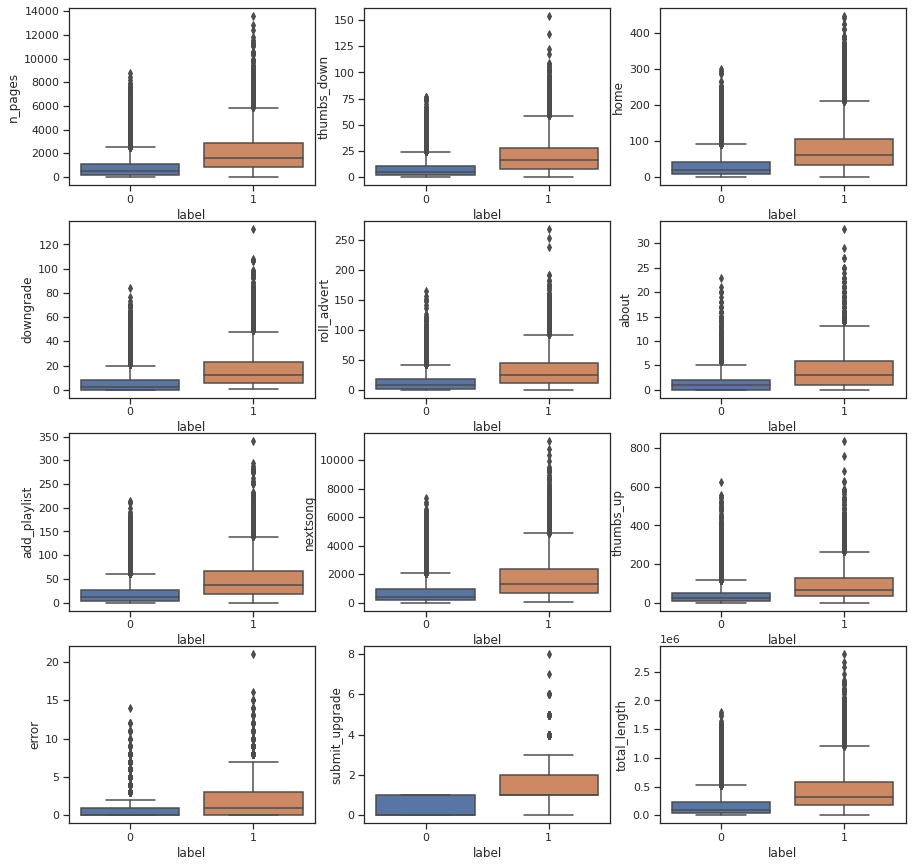

In [13]:
plt.rcParams['figure.figsize'] = (15,15)
j, k = 4, 3

plot = sns.boxplot

for m in range(12):
    plt.subplot(j,k,m+1)
    plot(data=features_df, y=features[m], x='label')


plt.show()

In [14]:
features.append('label')
features.insert(0, 'userId')

In [15]:
features_df = features_df[features]

In [16]:
features_df.fillna(value=0, inplace=True)

In [17]:
features_spark_df = spark.createDataFrame(features_df)

In [18]:
features_spark_df

userId,n_pages,thumbs_down,home,downgrade,roll_advert,about,add_playlist,nextsong,thumbs_up,error,submit_upgrade,total_length,label
1679072,1772,13,60,12,19,2,47,1460,81,0,1,356609.0,1
1141231,6191,54,211,62,34,15,133,5178,270,5,2,1277780.0,1
1163054,1063,6,28,7,17,3,16,900,40,0,1,223583.0,0
1585825,1217,14,56,8,20,4,29,982,46,2,2,244439.0,1
1367398,1681,14,53,8,40,6,37,1363,90,2,1,334897.0,0
1458511,748,10,30,8,1,3,21,612,25,1,1,149060.0,0
1048010,543,5,32,0,22,1,8,425,22,0,1,105381.0,0
1769374,1471,8,56,16,35,4,26,1200,53,0,1,297166.0,1
1996694,3011,18,124,30,60,6,70,2429,115,4,2,606958.0,1
1502623,2457,14,94,19,22,6,64,2032,108,1,1,501868.0,0


In [20]:
features_spark_df.coalesce(1).write.options(header='True', delimiter=',').csv("clean_data")